<a href="https://colab.research.google.com/github/superbunny38/2021Algorithms/blob/main/%EB%B6%84%ED%95%A0%EC%A0%95%EB%B3%B5_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분할 정복 알고리즘(Divide and Conquer Algorithm)

주어진 문제의 입력을 나눌 수 없을 때까지 분할(Divide)하여 문제를 해결(Conquer : 정복)한 뒤, 다시 병합(Combine)하는 방식

<br>
단계:

1. <b>분할(Divide)</b>: 원래 문제를 분할하여 더 작은 하위 문제들 나눈다.

2. <b>정복(Conquer)</b>: 하위 문제 각각을 재귀적으로 해결. (정복 과정에서 더이상 분할하지 않고 곧장 풀 수 있는 매우 작은 문제를 기저 사례(base case)라 한다.)

3. <b>병합(merge)</b>: 하위 문제들의 답을 합쳐서 원래 문제를 해결

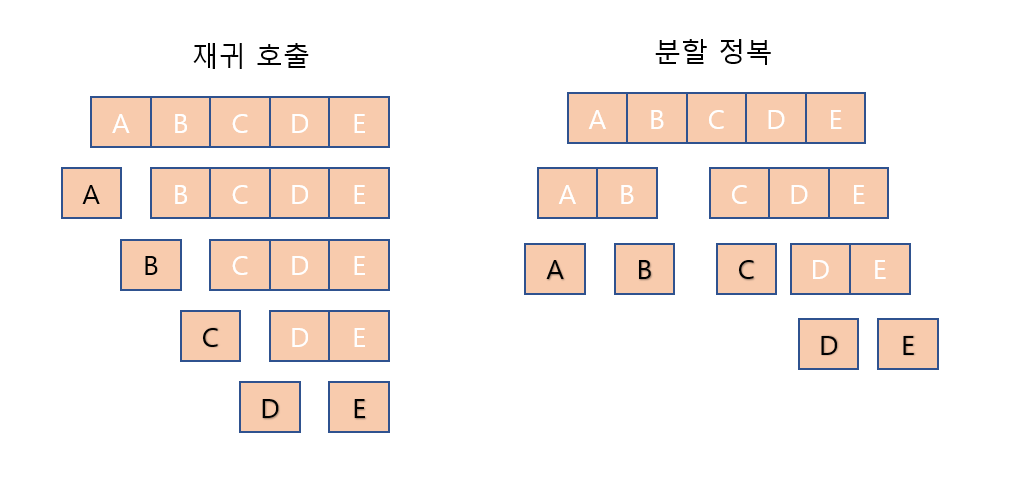

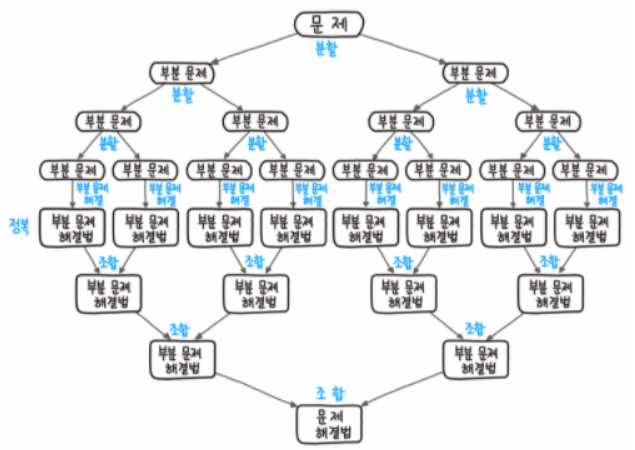


의사코드
```
function F(x):
    if F(x)가 간단 then:
        return F(x)를 계산한 값 # 정복
    else:
        x를 x1, x2로 분할
        F(x1)과 F(x2) 호출 # 분할
        return F(x1), F(x2)로 구한 값 # 조합
```



동적 계획법 VS. 분할 정복

- 동적 계획법:

  중복된 문제의 답은 저장되어 상위 문제 해결 시 재활용 됨 (메모이제이션 기법)

- 분할 정복:

  부분 문제는 서로 중복되지 않음(메모이제이션 기법 사용 안함)

관련 문제:
- 합병 정렬(Merge Sort)
- 이진 탐색(Binary Search)
- 퀵 정렬(Quick Sort)

## Merge Sort(합병 정렬)

1. 리스트의 길이가 0 또는 1이면 이미 정렬된 것으로 본다. 그렇지 않은 경우에는
2. 정렬되지 않은 리스트를 절반으로 잘라 비슷한 크기의 두 부분 리스트로 나눈다.
3. 각 부분 리스트를 재귀적으로 합병 정렬을 이용해 정렬한다.
4. 두 부분 리스트를 다시 하나의 정렬된 리스트로 합병한다.

출처:
https://gmlwjd9405.github.io/2018/05/08/algorithm-merge-sort.html

In [1]:
#https://www.geeksforgeeks.org/python-program-for-merge-sort/
#assumes that arr[l..m] and arr[m+1..r] are sorted and merges the two sorted sub-arrays into one
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)
 
    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
 
    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
 
# l is for left index and r is right index of the
# sub-array of arr to be sorted

In [13]:
def mergeSort(arr, l, r):
    if l < r:
 
        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2
 
        # Sort first and second halves
        print("mergesort({},{},{})".format(arr,l,m))
        mergeSort(arr, l, m)
        print("mergesort({},{},{})".format(arr,m+1,l))
        mergeSort(arr, m+1, r)
        print("merge")
        merge(arr, l, m, r)

In [14]:
# Driver code to test above
arr = [12, 11, 13, 5, 6, 7]
n = len(arr)
print("Given array is")
for i in range(n):
    print("%d" % arr[i],end = " ")

print("\n\n\n=======Initiate Merge Sort=========")
mergeSort(arr, 0, n-1)
print("\n\nSorted array is")
for i in range(n):
    print("%d" % arr[i],end = " ")

Given array is
12 11 13 5 6 7 


=======Initiate Merge Sort=========
mergesort([12, 11, 13, 5, 6, 7],0,2)
mergesort([12, 11, 13, 5, 6, 7],0,1)
mergesort([12, 11, 13, 5, 6, 7],0,0)
mergesort([12, 11, 13, 5, 6, 7],1,0)
merge
mergesort([11, 12, 13, 5, 6, 7],2,0)
merge
mergesort([11, 12, 13, 5, 6, 7],3,0)
mergesort([11, 12, 13, 5, 6, 7],3,4)
mergesort([11, 12, 13, 5, 6, 7],3,3)
mergesort([11, 12, 13, 5, 6, 7],4,3)
merge
mergesort([11, 12, 13, 5, 6, 7],5,3)
merge
merge


Sorted array is
5 6 7 11 12 13 

## Binary Search(이진 탐색)
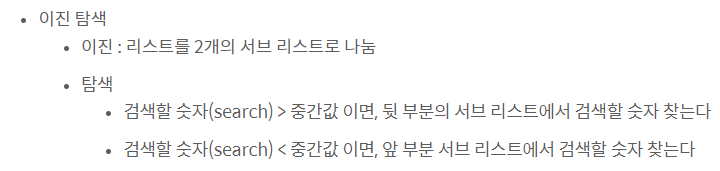

In [16]:
def binary_search_recursion(target, start, end, data):
    if start > end:
        return None

    mid = (start + end) // 2

    if data[mid] == target:
        return mid
    elif data[mid] > target:
        end = mid - 1
    else:
        start = mid + 1        

    return binary_search_recursion(target, start, end, data)

# 테스트용 코드
if __name__ == '__main__':
    li = [i*3 for i in range(11)]
    target = 6
    idx = binary_search_recursion(target, 0, 10, li)
    print("target: ",target)
    print("array:",li)
    print("target found at index:",idx)

target:  6
array: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
target found at index: 2


## Quick Sort(퀵 정렬)
1.  기준점(pivot)을 정해서, 기준점보다 작은 데이터는 왼쪽(left), 큰 데이터는 오른쪽(right)으로 모음

3. 위에서 모은 왼쪽(left), 오른쪽(right)의 갯수가 1개 이하가 될 때까지 위 작업을 재귀로 반복함

3. 재귀 함수는 왼쪽(left) + 기준점(pivot) + 오른쪽(right) 을 리턴함

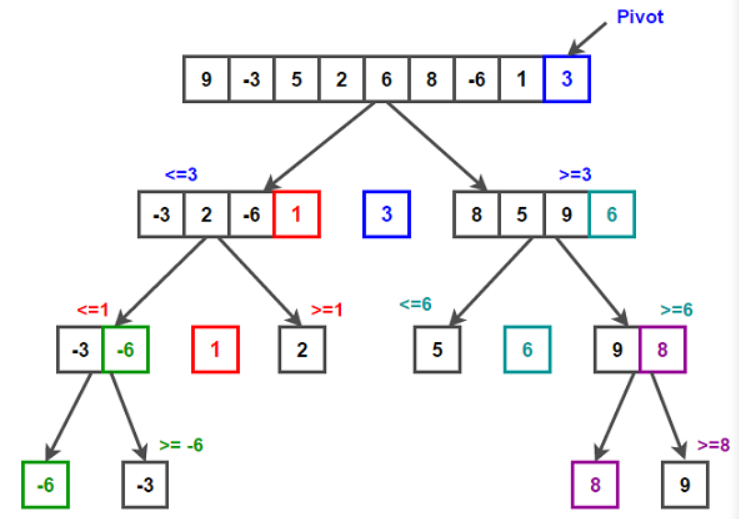

In [20]:
def swap(A, i, j):
 
    temp = A[i]
    A[i] = A[j]
    A[j] = temp
 
 
# Partition using the Lomuto partition scheme
def partition(a, start, end):
 
    # Pick the rightmost element as a pivot from the list
    pivot = a[end]
    print("pivot:",pivot)
    # elements less than the pivot will be pushed to the left of `pIndex`
    # elements more than the pivot will be pushed to the right of `pIndex`
    # equal elements can go either way
    pIndex = start
 
    # each time we find an element less than or equal to the pivot,
    # `pIndex` is incremented, and that element would be placed
    # before the pivot.
    for i in range(start, end):
        if a[i] <= pivot:
            swap(a, i, pIndex)
            pIndex = pIndex + 1
 
    # swap `pIndex` with pivot
    swap(a, end, pIndex)
 
    # return `pIndex` (index of the pivot element)
    return pIndex
 
 
# Quicksort routine
def quicksort(a, start, end):
 
    # base condition
    if start >= end:
        return
 
    # rearrange elements across pivot
    pivot = partition(a, start, end)
 
    # recur on sublist containing elements less than the pivot
    quicksort(a, start, pivot - 1)
 
    # recur on sublist containing elements more than the pivot
    quicksort(a, pivot + 1, end)
 
 
# Python implementation of the Quicksort algorithm
if __name__ == '__main__':
 
    a = [9, -3, 5, 2, 6, 8, -6, 1, 3]
    print("original array:",a)
    quicksort(a, 0, len(a) - 1)
    print("after quick sort:",a)

original array: [9, -3, 5, 2, 6, 8, -6, 1, 3]
pivot: 3
pivot: 1
pivot: -6
pivot: 6
pivot: 8
after quick sort: [-6, -3, 1, 2, 3, 5, 6, 8, 9]


문제 list:

https://www.acmicpc.net/problem/2447

https://www.acmicpc.net/problem/1074

https://www.acmicpc.net/problem/1780

https://www.acmicpc.net/problem/2448

https://www.acmicpc.net/problem/6549

https://www.acmicpc.net/problem/1725